In [1]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

[+] 0.0s
pkgs/main/linux-64 ━━━━━━━━━━━╸━━━━━━━━━━━━━   0.0 B /  ??.?MB @  ??.?MB/s

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

### Question 1: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the tesla_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.


In [3]:
tesla_stock = yf.Ticker("TSLA")

In [4]:
tesla_data = tesla_stock.history(period = "max")

In [5]:
tesla_data.reset_index(inplace = True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


### Question 2: Use Webscraping to Extract Tesla Revenue Data

Display the last five rows of the tesla_revenue dataframe using the tail function. Upload a screenshot of the results.

In [9]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
print(response)
soup = BeautifulSoup(response.text, "html.parser")
revenue_data = []
tesla_revenue = pd.DataFrame({"Revenue": revenue_data})

<Response [200]>


In [16]:
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"]) 

for table in soup.find_all('table'):

    if ('Tesla Quarterly Revenue' in table.find('th').text):
        rows = table.find_all('tr')
        
        for row in rows:
            col = row.find_all('td')
            
            if col != []:
                date = col[0].text
                revenue = col[1].text.replace(',','').replace('$','')

                tesla_revenue = tesla_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)

In [17]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [18]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [19]:
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


### Question 3: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the gme_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [34]:
gme_stock = yf.Ticker("GME")

In [35]:
gme_data = gme_stock.history(period = "max")

In [36]:
gme_data.reset_index(inplace = True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14,1.712708,1.716074,1.670627,1.683251,11021600,0.0,0.0
2,2002-02-15,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


### Question 4: Use Webscraping to Extract GME Revenue Data

Display the last five rows of the gme_revenue dataframe using the tail function. Upload a screenshot of the results.



In [20]:
url = " https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)
print(response)
soup = BeautifulSoup(response.text, "html.parser")
revenue_data = []
gme_revenue = pd.DataFrame({"Revenue": revenue_data})

<Response [200]>


In [23]:
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"]) 

gme_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

for table in soup.find_all('table'):

    if ('GameStop Quarterly Revenue' in table.find('th').text):
        rows = table.find_all('tr')
        
        for row in rows:
            col = row.find_all('td')
            
            if col != []:
                date = col[0].text
                revenue = col[1].text.replace(',','').replace('$','')

                gme_revenue = gme_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)

In [24]:
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


### Question 5: Plot Tesla Stock Graph

Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.
Upload a screenshot of your results.

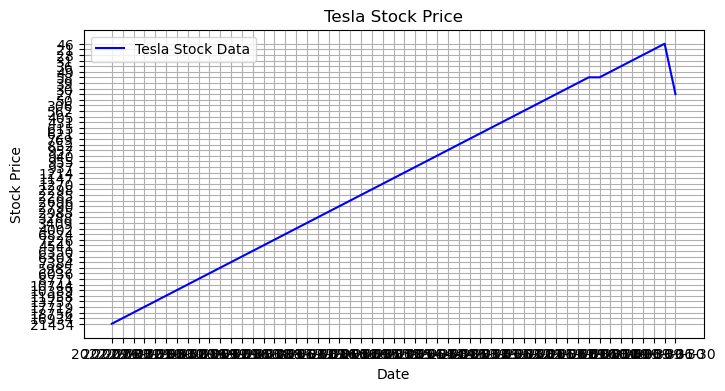

In [34]:
def make_graph(x_data, y_data, title):
    plt.figure(figsize=(8, 4))
    plt.plot(x_data, y_data, label="Tesla Stock Data", color="blue")
    plt.xlabel("Date")
    plt.ylabel("Stock Price")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

x_data = tesla_revenue["Date"]
y_data = tesla_revenue["Revenue"]

make_graph(x_data, y_data, "Tesla Stock Price")

### Question 6: Plot GameStop Stock Graph

Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph.
Upload a screenshot of your results.

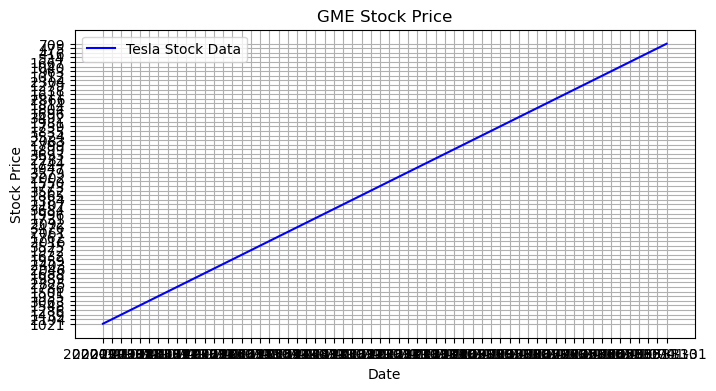

In [35]:
def make_graph(x_data, y_data, title):
    plt.figure(figsize=(8, 4))  
    plt.plot(x_data, y_data, label="Tesla Stock Data", color="blue")
    plt.xlabel("Date")
    plt.ylabel("Stock Price")
    plt.title(title)  
    plt.legend()
    plt.grid(True)
    plt.show()

# Sample data (replace with your own data)
x_data = gme_revenue["Date"]
y_data = gme_revenue["Revenue"]

# Call the make_graph function with your data and a title
make_graph(x_data, y_data, "GME Stock Price")